In [244]:
import numpy as np
import pandas as pd 


import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
import lightgbm as lgb
from sklearn.model_selection import cross_val_score, KFold

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from scipy.stats import randint, uniform
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.model_selection import RandomizedSearchCV
# !pip install mplcursors
import mplcursors

In [27]:
# !pip install plotly


In [28]:
df = pd.read_csv('fuel_consumption.csv')

In [29]:
df = df[df['data_engineSpeed'] != 0] 

In [30]:

max_engine_speed = df.groupby('consumTotal')['data_engineSpeed'].max().reset_index()
min_engine_speed = df.groupby('consumTotal')['data_engineSpeed'].min().reset_index()

engine_speed_stats = pd.merge(max_engine_speed, min_engine_speed, on='consumTotal', suffixes=('_max', '_min'))


In [31]:
fig = make_subplots()

fig.add_trace(go.Scatter(
    x=engine_speed_stats['consumTotal'],
    y=engine_speed_stats['data_engineSpeed_max'],
    mode='lines+markers',
    name='Max Engine Speed'
))

fig.add_trace(go.Scatter(
    x=engine_speed_stats['consumTotal'],
    y=engine_speed_stats['data_engineSpeed_min'],
    mode='lines+markers',
    name='Min Engine Speed'
))

fig.update_layout(
    title='Max and Min Engine Speed by ConsumTotal',
    xaxis_title='ConsumTotal',
    yaxis_title='Engine Speed',
    legend_title='Engine Speed Stats',
    hovermode='x unified'
)

fig.show()


In [23]:
df.groupby('consumTotal')['data_engineSpeed'].describe()

,count,mean,std,min,25%,50%,75%,max
consumTotal,,,,,,,,
4.75,986.0,1392.287018,163.819964,86.0,1417.00,1433.0,1448.0,1554.0
6.50,1327.0,1371.320271,174.628532,791.0,1350.50,1444.0,1462.0,1619.0
13.50,2944.0,1457.916780,94.699174,787.0,1464.00,1480.0,1492.0,1606.0
18.00,1316.0,1538.014438,355.565286,772.0,1352.75,1726.0,1763.0,1894.0
23.50,2944.0,1457.916780,94.699174,787.0,1464.00,1480.0,1492.0,1606.0
27.97,25372.0,1158.177282,441.811886,35.0,839.00,845.0,1568.0,2427.0
31.04,11224.0,1308.207858,221.511033,58.0,1170.00,1332.5,1504.0,1811.0
33.48,9116.0,1211.399079,268.589741,32.0,983.00,1251.0,1440.0,2108.0
34.25,324.0,1535.867284,470.820236,48.0,972.00,1912.0,1930.0,1991.0


In [32]:
grouped = df.groupby('consumTotal')['data_engineSpeed']


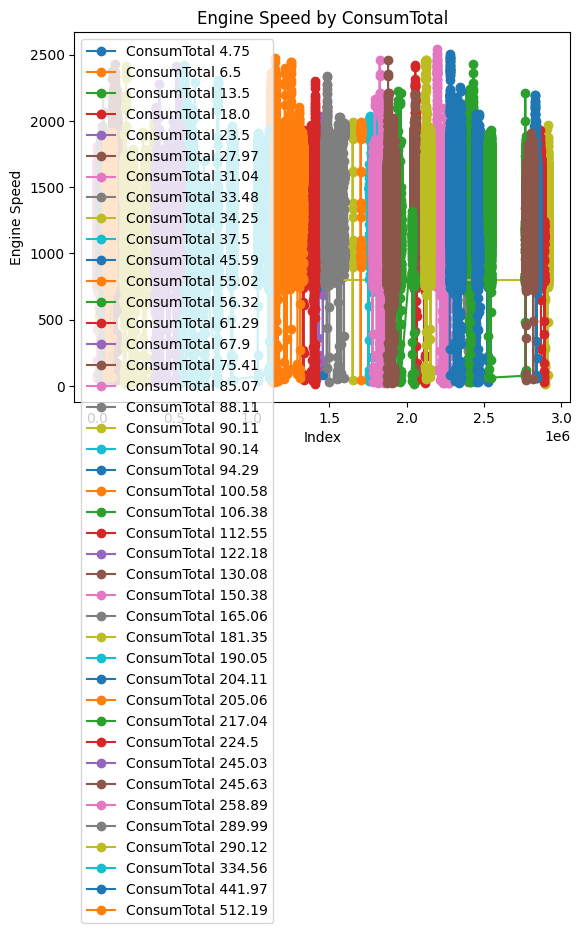

In [33]:
fig, ax = plt.subplots()

for consumTotal, group in grouped:
    ax.plot(group.index, group, marker='o', label=f'ConsumTotal {consumTotal}')

ax.set_xlabel('Index')
ax.set_ylabel('Engine Speed')
ax.set_title('Engine Speed by ConsumTotal')
ax.legend()

# Add interactivity with mplcursors
cursor = mplcursors.cursor(ax, hover=True)

@cursor.connect("add")
def on_add(sel):
    sel.annotation.set_text(f'Index: {sel.target[0]}, Speed: {sel.target[1]}')

plt.show()


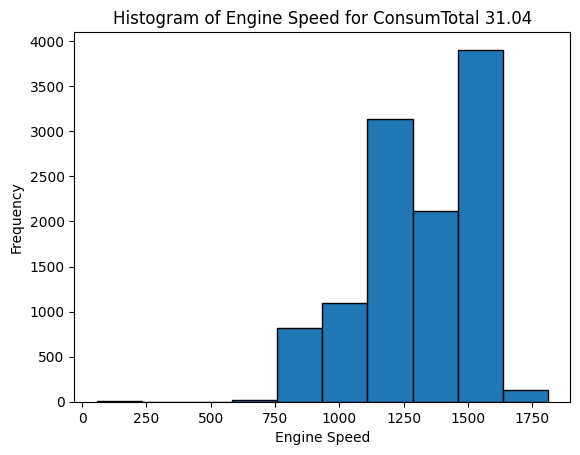

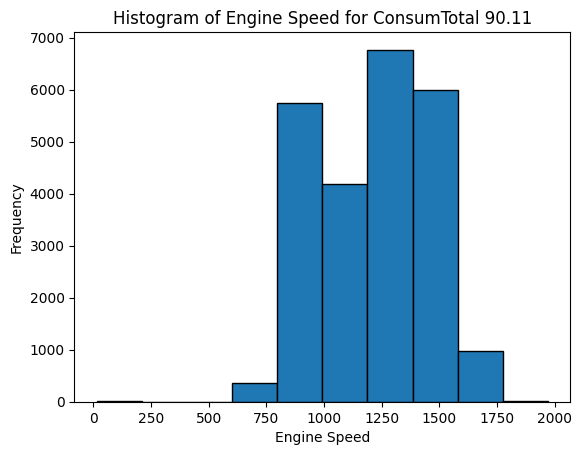

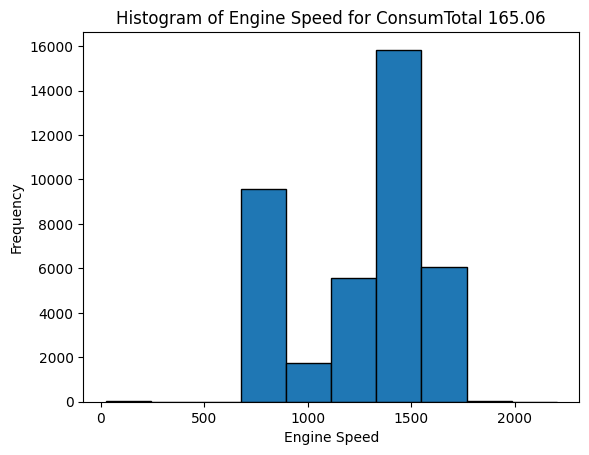

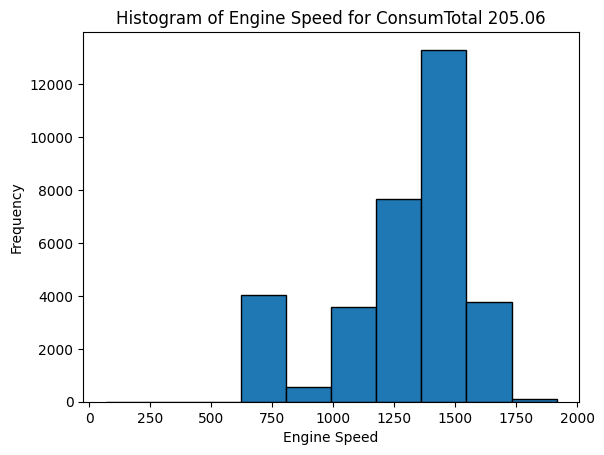

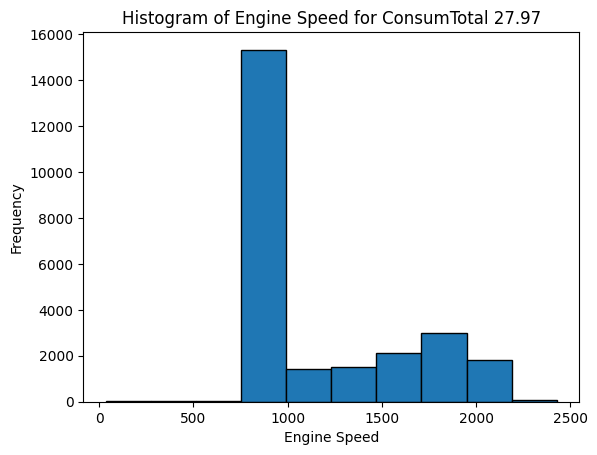

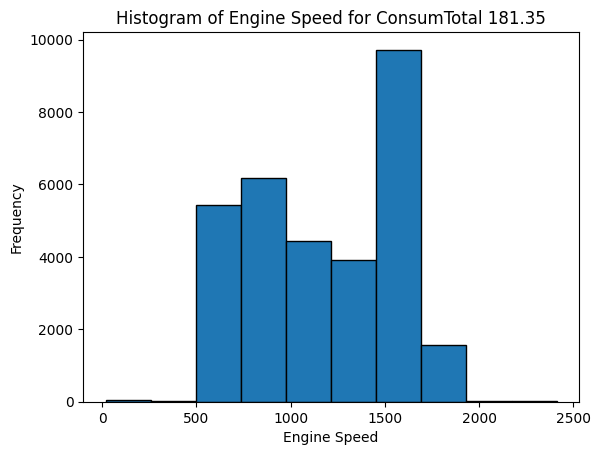

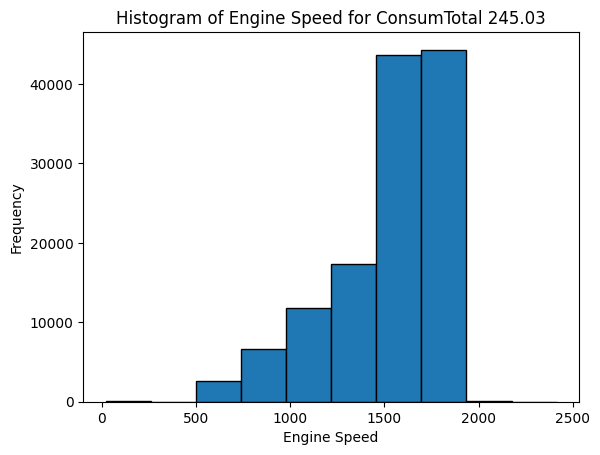

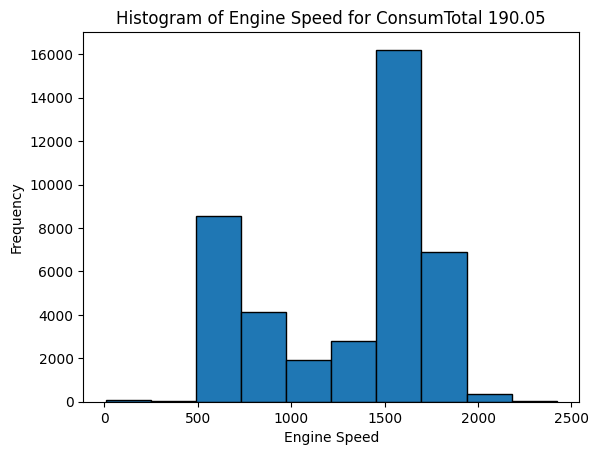

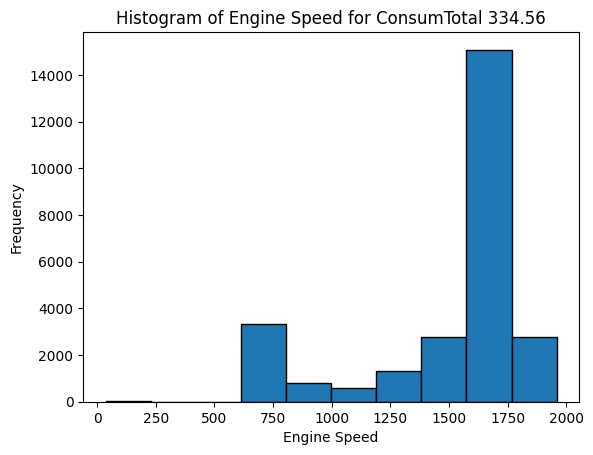

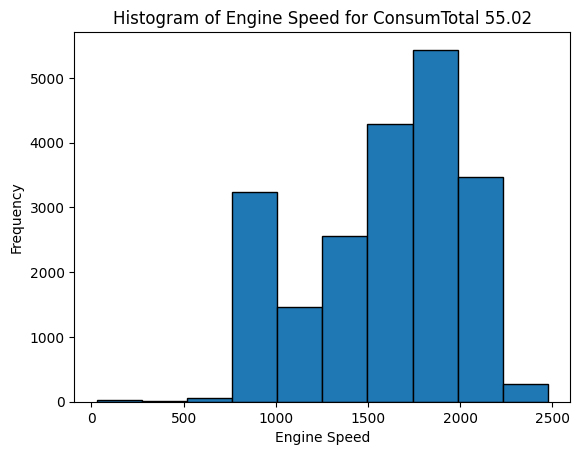

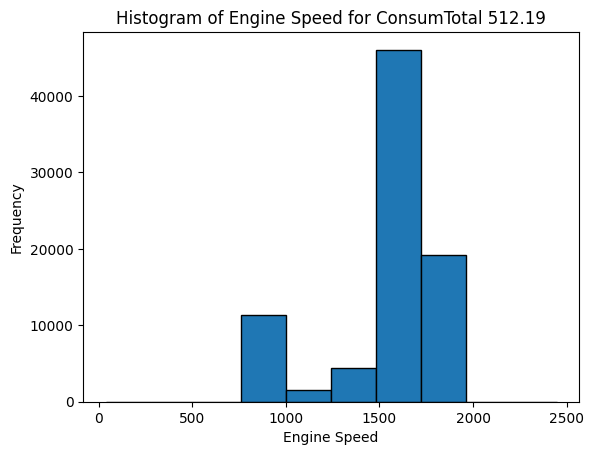

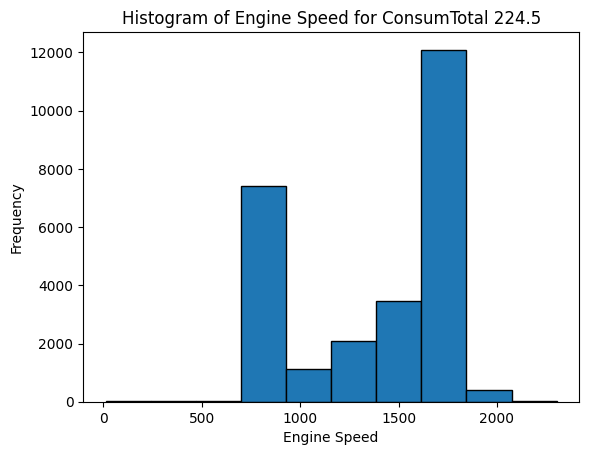

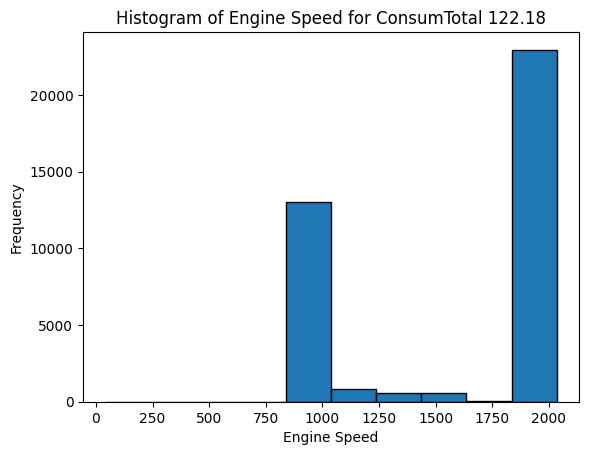

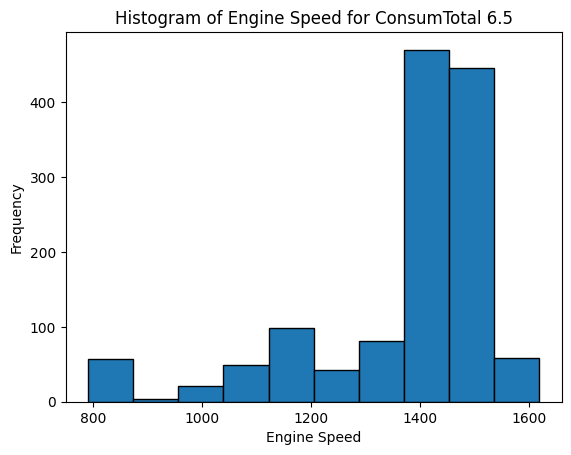

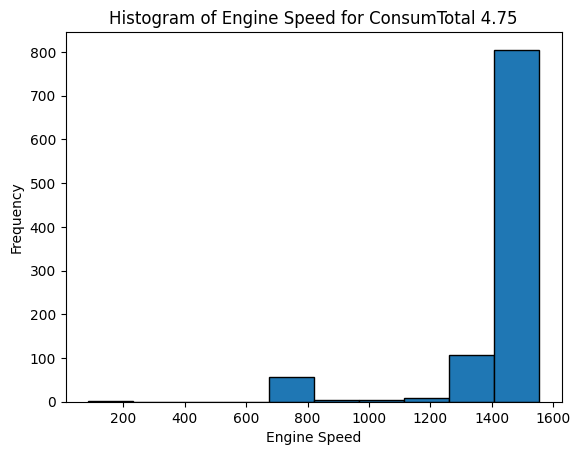

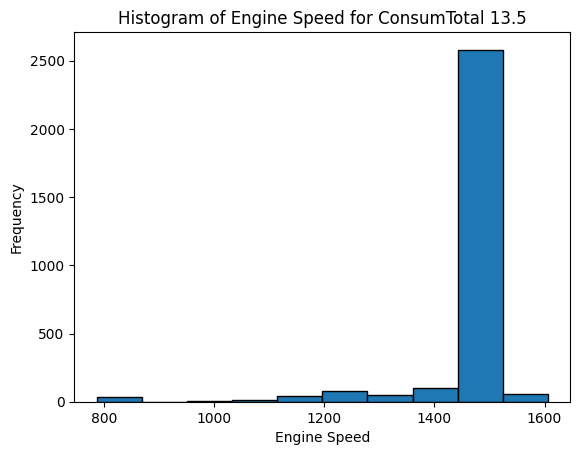

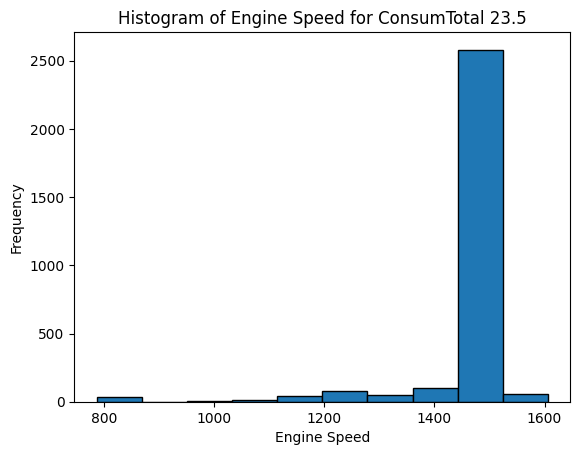

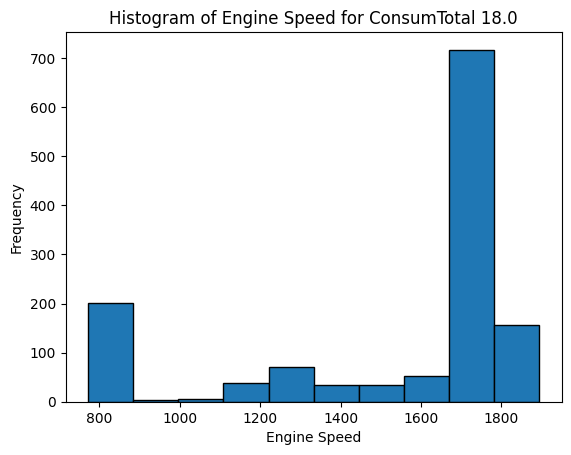

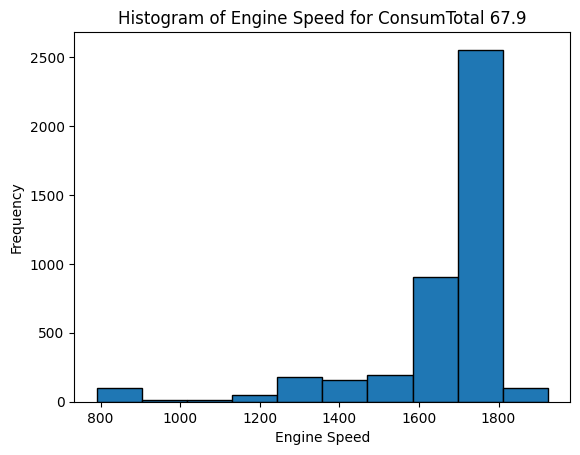

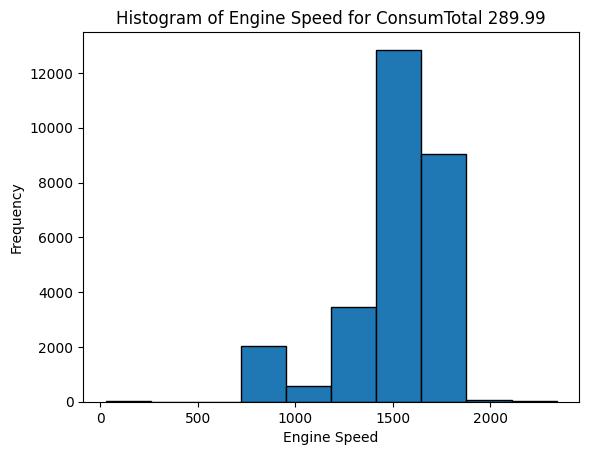

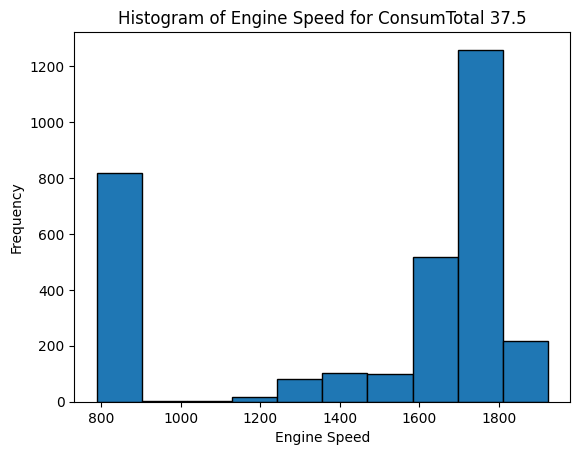

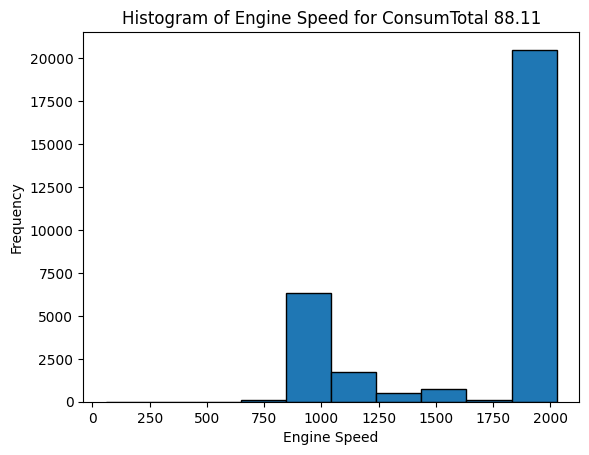

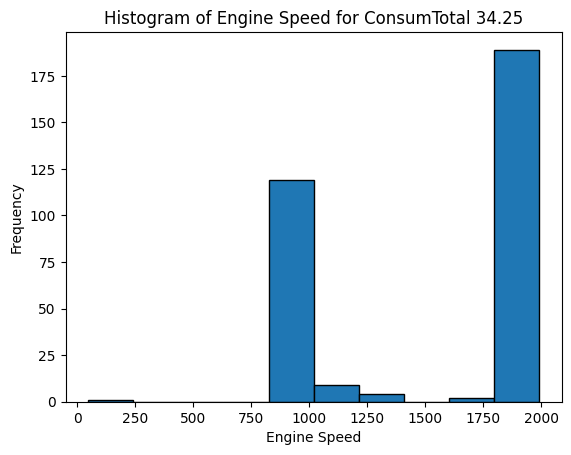

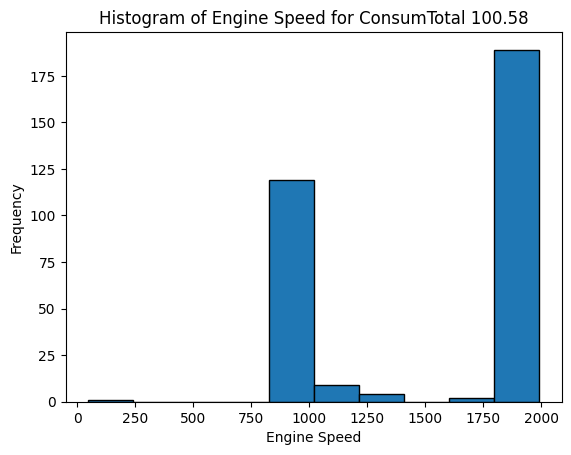

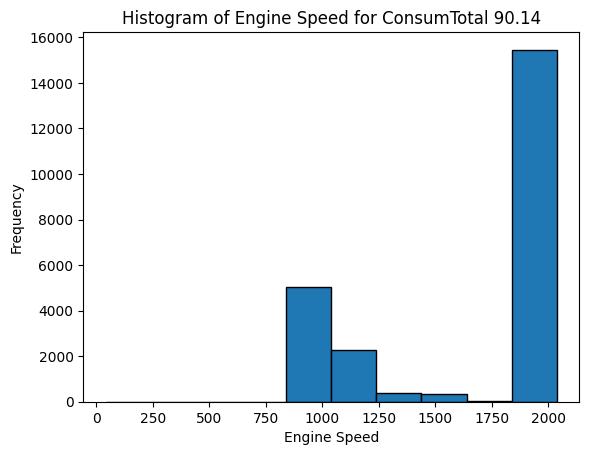

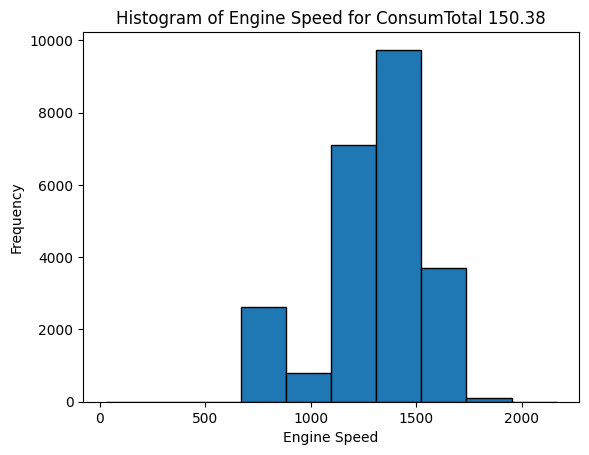

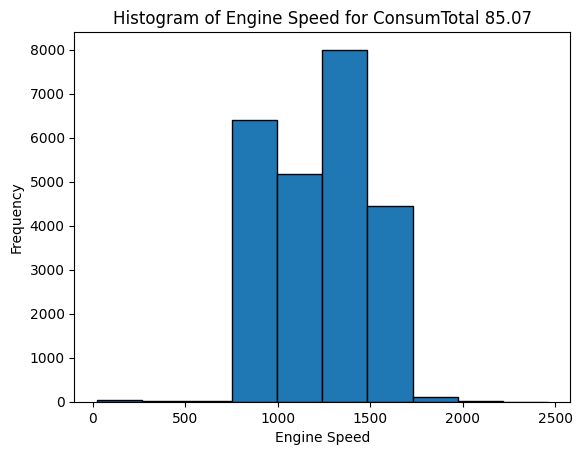

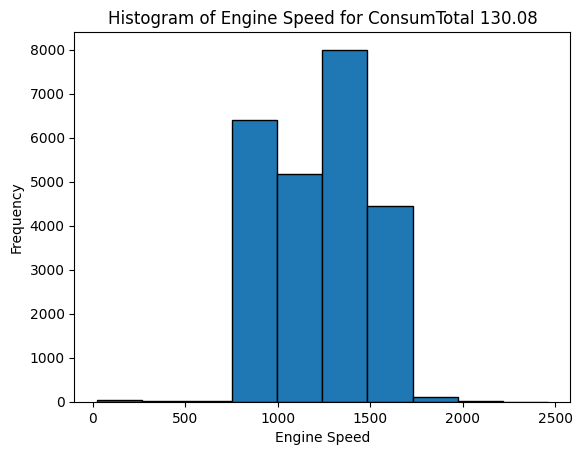

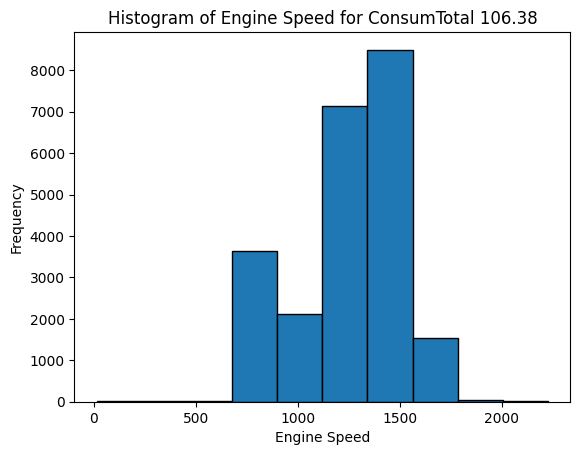

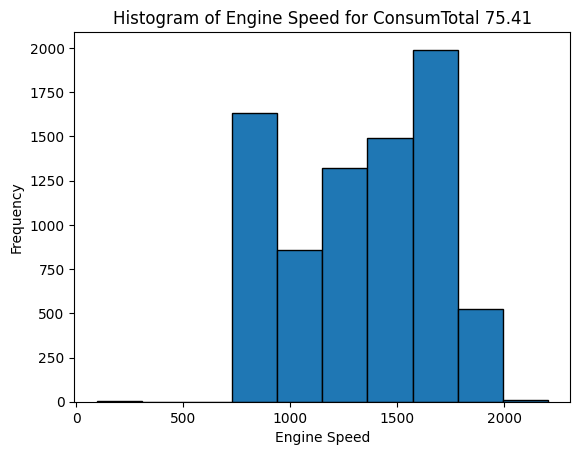

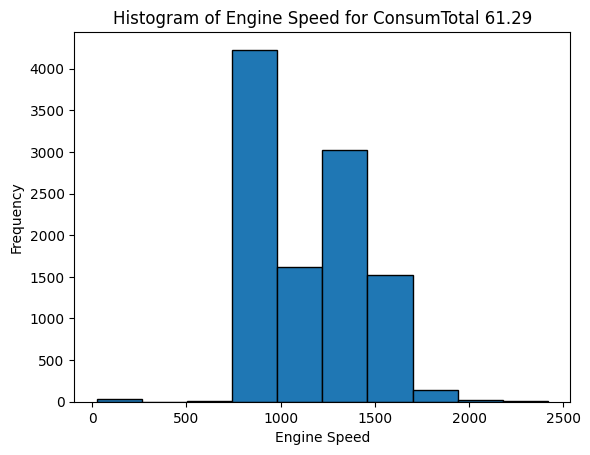

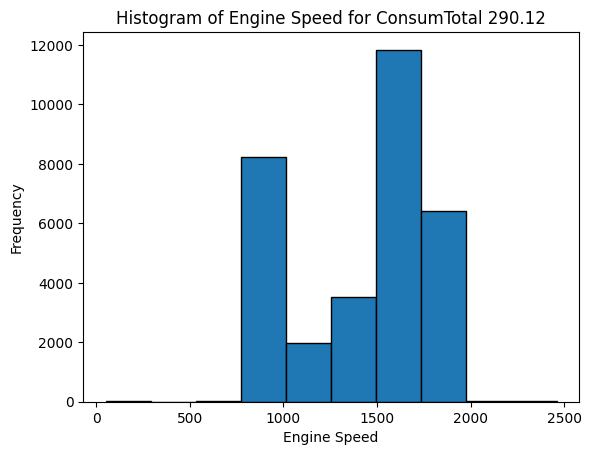

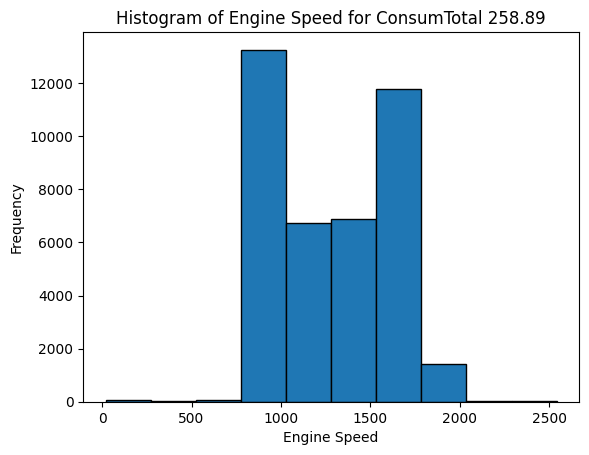

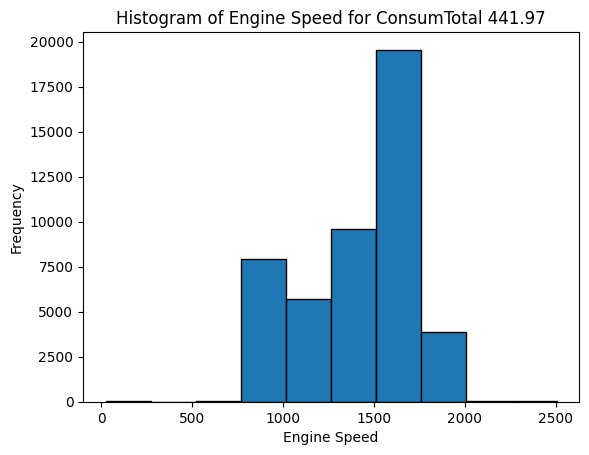

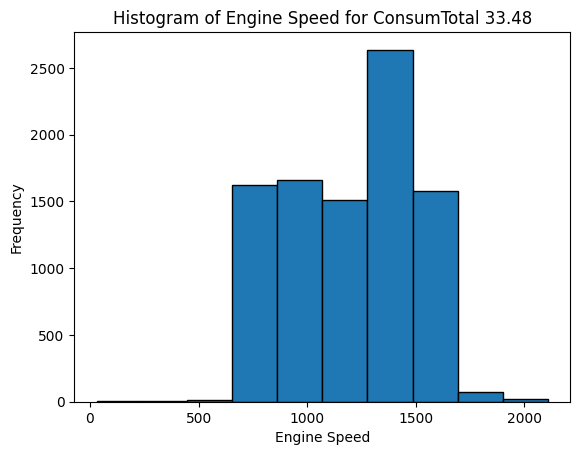

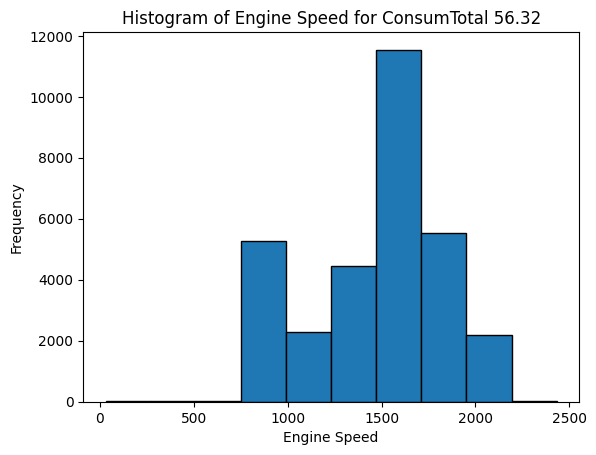

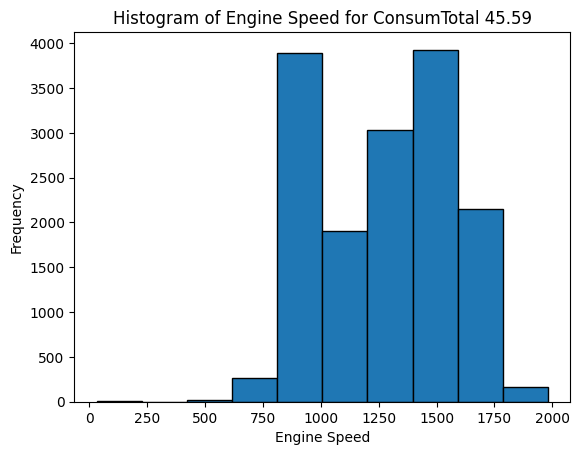

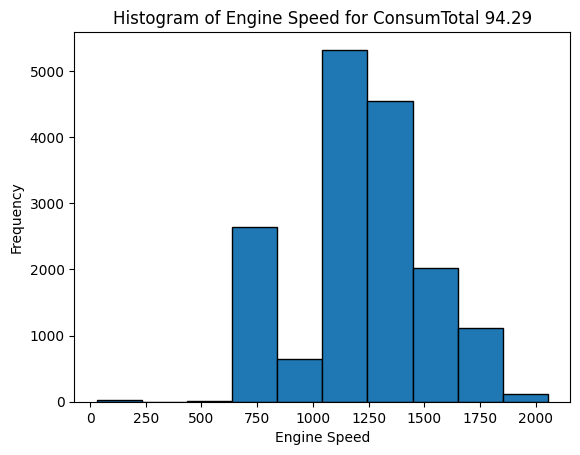

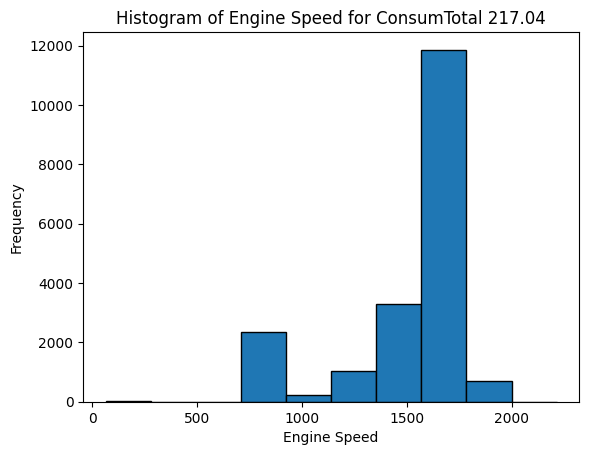

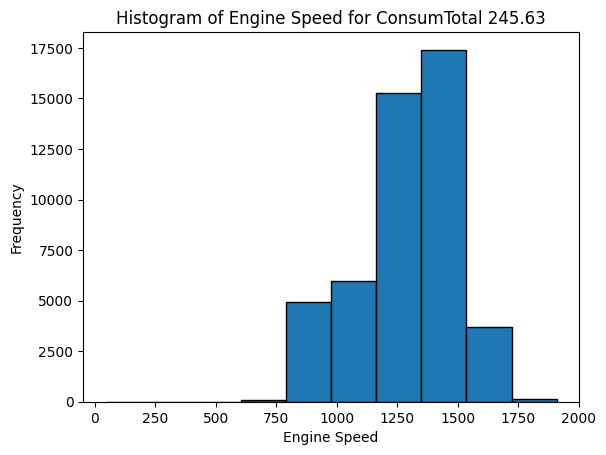

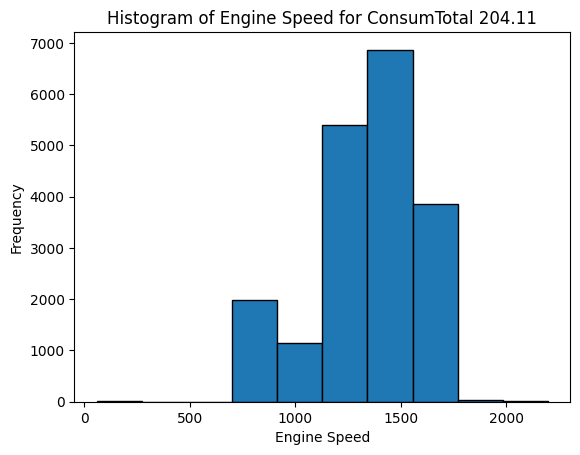

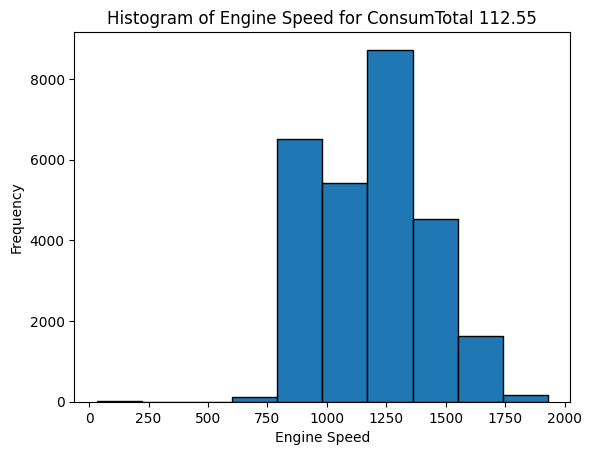

In [34]:
consum_totals = df['consumTotal'].unique()

# Create histograms for each consumTotal
for consumTotal in consum_totals:
    subset = df[df['consumTotal'] == consumTotal]
    plt.figure()
    plt.hist(subset['data_engineSpeed'], bins=10, edgecolor='k')
    plt.title(f'Histogram of Engine Speed for ConsumTotal {consumTotal}')
    plt.xlabel('Engine Speed')
    plt.ylabel('Frequency')
    plt.show()

In [35]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

# Function to calculate 3D distance
def calculate_3d_distance(lat1, lon1, alt1, lat2, lon2, alt2):
    horizontal_distance = haversine(lat1, lon1, lat2, lon2)
    vertical_distance = abs(alt2 - alt1) / 1000  # Convert altitude from meters to km
    distance_3d = np.sqrt(horizontal_distance**2 + vertical_distance**2)
    return distance_3d

In [36]:
df['data_time'] = pd.to_datetime(df['data_time'])

In [37]:
df['distance_km'] = 0.0

data_shifted = df[['data_latitude', 'data_longitude', 'data_altitude']].shift(1)
df['distance_km'] = calculate_3d_distance(data_shifted['data_latitude'], data_shifted['data_longitude'], data_shifted['data_altitude'],
                                             df['data_latitude'], df['data_longitude'], df['data_altitude'])

total_distances = df.groupby('consumTotal')['distance_km'].sum().reset_index()
total_distances.columns = ['consumTotal', 'total_distance_km']

In [38]:
total_distances.head()

,consumTotal,total_distance_km
0,4.75,1.487944
1,6.50,9.362669
2,13.50,5.179244
3,18.00,7.924140
4,23.50,5.024452


In [39]:
runtime = []
for case in df['consumTotal'].unique():
    tmp = df[df['consumTotal'] == case]
    x = len(tmp) - len(tmp[tmp['data_engineSpeed']==0])
    runtime.append(x)
    
tractor_runtime = pd.DataFrame({'consumTotal': df['consumTotal'].unique(), 'total_runtime': runtime})
tractor_runtime.head()

,consumTotal,total_runtime
0,31.04,11224
1,90.11,24046
2,165.06,38811
3,205.06,33077
4,27.97,25372


In [125]:
tractor_runtime = df.groupby('consumTotal')['data_time'].agg(['min', 'max'])
tractor_runtime['total_runtime'] = tractor_runtime['max'] - tractor_runtime['min']
tractor_runtime = tractor_runtime.reset_index()
tractor_runtime.head()

,consumTotal,min,max,total_runtime
0,4.75,2023-05-11 12:01:54+00:00,2023-05-11 12:18:00+00:00,0 days 00:16:06
1,6.50,2023-05-11 11:30:00+00:00,2023-05-11 11:52:00+00:00,0 days 00:22:00
2,13.50,2023-05-11 12:32:00+00:00,2023-05-11 13:21:00+00:00,0 days 00:49:00
3,18.00,2023-05-12 08:13:00+00:00,2023-05-12 08:35:00+00:00,0 days 00:22:00
4,23.50,2023-05-11 12:32:00+00:00,2023-05-11 13:21:00+00:00,0 days 00:49:00


In [126]:
mean_features = df.groupby('consumTotal')[['data_speed', 'data_engineSpeed', 'data_fuelRate']].mean().reset_index()
mean_features.head()

,consumTotal,data_speed,data_engineSpeed,data_fuelRate
0,4.75,4.809736,1392.287018,13.253803
1,6.50,5.470008,1371.320271,12.629050
2,13.50,5.793410,1457.916780,13.731318
3,18.00,8.678343,1538.014438,45.643845
4,23.50,5.793410,1457.916780,13.731318


In [41]:
# Get the tractor name 
tractor_name = pd.DataFrame(df.groupby('consumTotal')['Tractor'].value_counts())
tractor_name = tractor_name.reset_index()
tractor_name.head()

,consumTotal,Tractor,count
0,4.75,Fendt 828,986
1,6.50,Fendt 828,1327
2,13.50,Fendt 828,2944
3,18.00,Fendt 939,1316
4,23.50,Fendt 828,2944


In [42]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
tractor_name['Tractor'] = ordinal_encoder.fit_transform(tractor_name[['Tractor']])
tractor_name.head()

,consumTotal,Tractor,count
0,4.75,2.0,986
1,6.50,2.0,1327
2,13.50,2.0,2944
3,18.00,3.0,1316
4,23.50,2.0,2944


In [192]:
merged_mean_features = pd.concat([
#                     tractor_name.set_index('consumTotal')['Tractor'],
                    mean_features.set_index('consumTotal'), 
                    tractor_runtime.set_index('consumTotal')['total_runtime'], 
                    total_distances.set_index('consumTotal')], 
                   axis=1, 
                   join='inner').reset_index() 

merged_mean_features.head()

,consumTotal,data_speed,data_engineSpeed,data_fuelRate,total_runtime,total_distance_km
0,4.75,4.809736,1392.287018,13.253803,0 days 00:16:06,1.487944
1,6.50,5.470008,1371.320271,12.629050,0 days 00:22:00,9.362669
2,13.50,5.793410,1457.916780,13.731318,0 days 00:49:00,5.179244
3,18.00,8.678343,1538.014438,45.643845,0 days 00:22:00,7.924140
4,23.50,5.793410,1457.916780,13.731318,0 days 00:49:00,5.024452


In [193]:
merged_mean_features['total_runtime'] = merged_mean_features['total_runtime'].dt.total_seconds()

<Axes: >

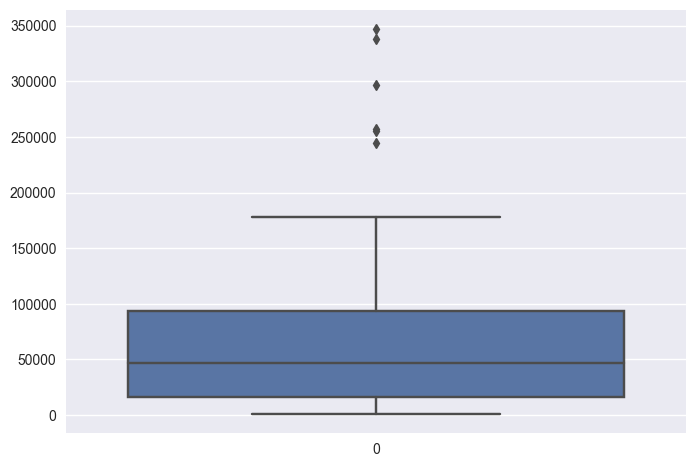

In [202]:
sns.boxplot(merged_mean_features['total_runtime'])

In [208]:
merged_mean_features = merged_mean_features[merged_mean_features['total_runtime']< 200000]

<Axes: >

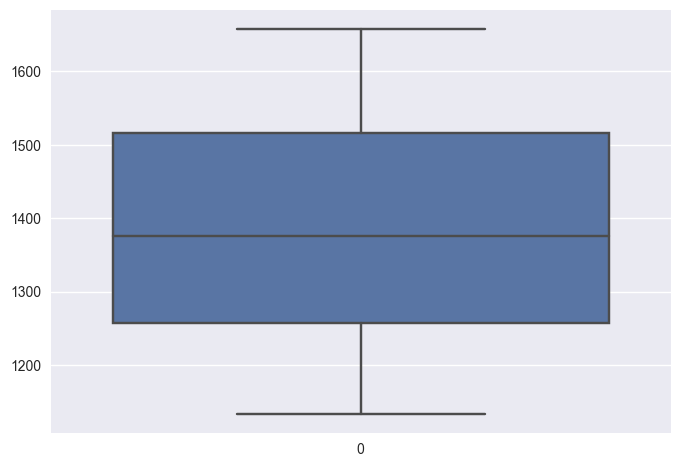

In [203]:
sns.boxplot(merged_mean_features['data_engineSpeed'])

<Axes: >

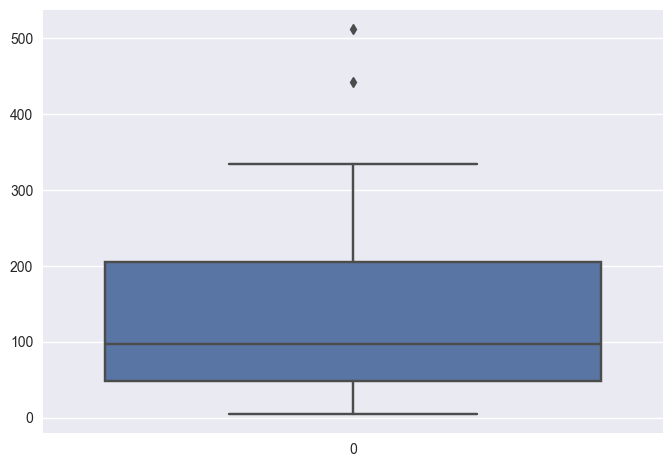

In [204]:
sns.boxplot(merged_mean_features['consumTotal'])

In [209]:
merged_mean_features = merged_mean_features[merged_mean_features['consumTotal'] < 400]

<Axes: >

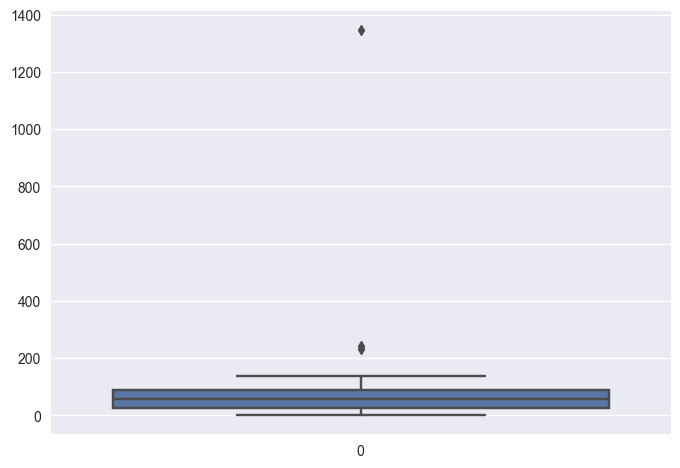

In [205]:
sns.boxplot(merged_mean_features['total_distance_km'])

In [212]:
merged_mean_features  = merged_mean_features[merged_mean_features['total_distance_km'] < 1000]

In [250]:
merged_mean_features.shape

(33, 6)

In [ ]:
sns.boxplot(merged_mean_features['total_runtime'])

<Axes: xlabel='consumTotal', ylabel='total_runtime'>

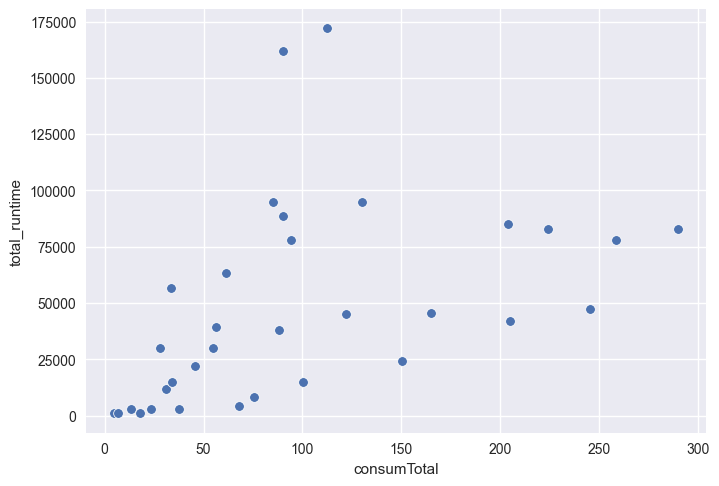

In [251]:
sns.scatterplot(x='consumTotal', y='total_runtime', data=merged_mean_features)



<Axes: xlabel='consumTotal', ylabel='total_distance_km'>

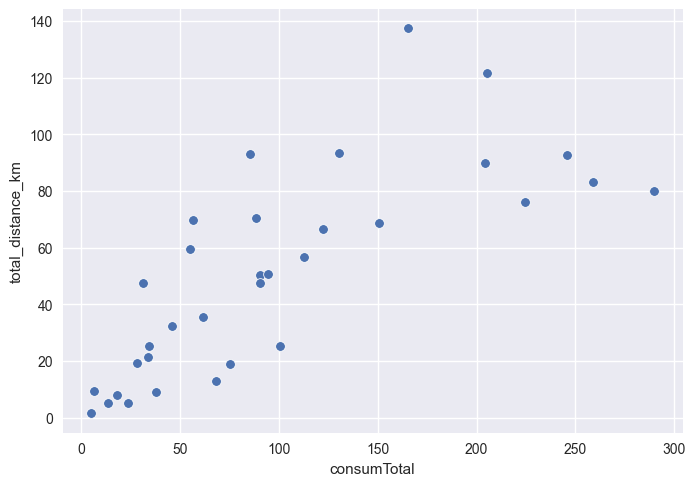

In [252]:
sns.scatterplot(x='consumTotal', y='total_distance_km', data=merged_mean_features)



<Axes: xlabel='consumTotal', ylabel='data_fuelRate'>

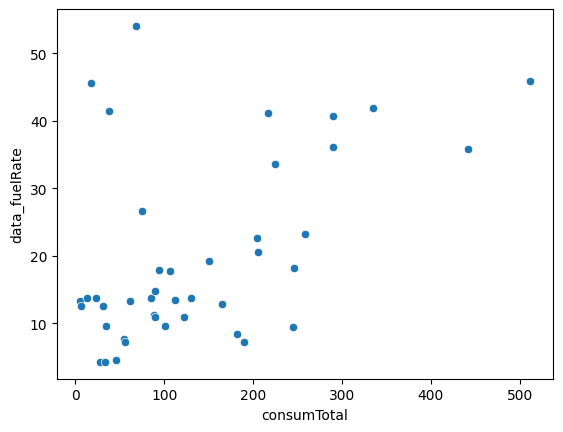

In [46]:
sns.scatterplot(x='consumTotal', y='data_fuelRate', data=merged_mean_features)



<Axes: xlabel='consumTotal', ylabel='data_engineSpeed'>

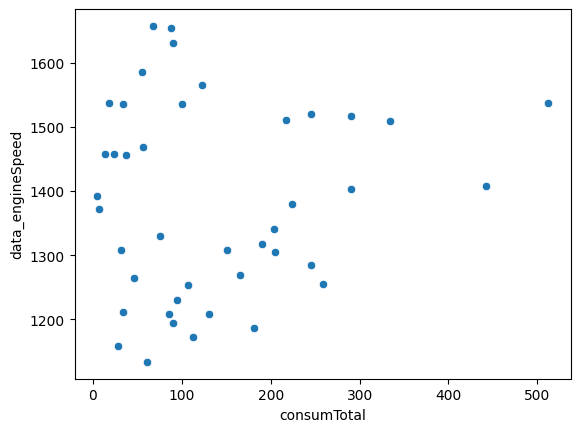

In [47]:
sns.scatterplot(x='consumTotal', y='data_engineSpeed', data=merged_mean_features)



In [49]:
# sns.barplot(x='Tractor', y='consumTotal', data=merged_mean_features)


In [133]:
merged_mean_features.corr()

,consumTotal,data_speed,data_engineSpeed,data_fuelRate,total_runtime,total_distance_km
consumTotal,1.000000,0.196156,0.099719,0.492323,0.456542,0.394243
data_speed,0.196156,1.000000,-0.087943,0.290459,-0.020268,0.066416
data_engineSpeed,0.099719,-0.087943,1.000000,0.376948,-0.156419,0.031680
data_fuelRate,0.492323,0.290459,0.376948,1.000000,0.007356,0.210787
total_runtime,0.456542,-0.020268,-0.156419,0.007356,1.000000,0.044482
total_distance_km,0.394243,0.066416,0.031680,0.210787,0.044482,1.000000


In [134]:
# merged_mean_features = merged_mean_features[merged_mean_features['total_distance_km'] < 1000] 


In [135]:
# merged_mean_features = merged_mean_features[merged_mean_features['total_runtime'] < 100000] 

In [213]:
merged_mean_features.shape

(33, 6)

In [356]:
X = merged_mean_features[['data_fuelRate', 'total_runtime', 'total_distance_km']]
y = merged_mean_features['consumTotal']


In [357]:
# Standardization
scaler = StandardScaler()
scaled_standard_X = scaler.fit_transform(X)


In [216]:
# Robust_scaling
scaler = RobustScaler()
scaled_robust_X = scaler.fit_transform(X)

In [198]:
scaler = MinMaxScaler()
scaled_minmax_X = scaler.fit_transform(X)


## Model Building

In [358]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [146]:
def r2_(y_true, y_pred):
    return r2_score(y_true, y_pred)

In [151]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(rf, scaled_robust_X, y, cv=cv, scoring=make_scorer(r2_))
scores

array([ 0.21828637,  0.9331404 , -2.56133278, -2.65343245,  0.68689585,
        0.78782145,  0.4541608 ,  0.36566815, -0.58174453,  0.78683738])

In [152]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)

cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(model, scaled_standard_X, y, cv=cv, scoring=make_scorer(r2))

scores

array([ 0.21828637,  0.9331404 , -2.56133278, -2.65343245,  0.68689585,
        0.78782145,  0.4541608 ,  0.36566815, -0.58174453,  0.78683738])

In [304]:
rf = RandomForestRegressor(**best_params, random_state=42)

cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(rf, X, y, cv=cv, scoring=make_scorer(r2_))



scores

array([ 0.9128509 ,  0.0749012 , -2.29327496, -1.92758327,  0.89963115,
        0.95255491,  0.3126589 ,  0.31827741,  0.80306896,  0.92341552])

In [308]:
fold_index = 1
for i, (train_index, test_index) in enumerate(cv.split(X.values, y)):
    if i == fold_index:
        X_test_fold = X.values[test_index]
        y_test_fold = y[test_index]
        break
        
print(X_test_fold)
print(y_test_fold)

[[9.65246914e+00 1.47680000e+04 2.51854290e+01]
 [4.15334135e+01 3.12000000e+03 8.90326582e+00]
 [1.09660096e+01 8.86900000e+04 4.76846595e+01]
 [9.65246914e+00 1.47680000e+04 2.52092426e+01]]
8      34.25
9      37.50
19     90.14
21    100.58
Name: consumTotal, dtype: float64


In [289]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train) 
y_pred = rf.predict(X_test) 
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 
print(f'Mean Squared Error: {mse}') 
print(f'R2 Score: {r2}')

Mean Squared Error: 4861.360372525616
R2 Score: 0.10925290410977506


In [331]:
# hyperparameter Tune 
param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': [None] + list(randint(5, 50).rvs(10)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': uniform(0.1, 0.9)
}

rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100,
                                   cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_

In [332]:
best_params

{'max_depth': 40,
 'max_features': 0.902841899659402,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 333}

In [333]:
rf = RandomForestRegressor(**best_params, random_state=42)
rf.fit(X_train, y_train) 
y_pred = rf.predict(X_test) 
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 
print(f'Mean Squared Error: {mse}') 
print(f'R2 Score: {r2}')

Mean Squared Error: 501.95084937933035
R2 Score: 0.9080275422716743


In [343]:
feature_importances = rf.feature_importances_

print("Feature Importances:", feature_importances)

Feature Importances: [0.27606651 0.18613009 0.53780341]


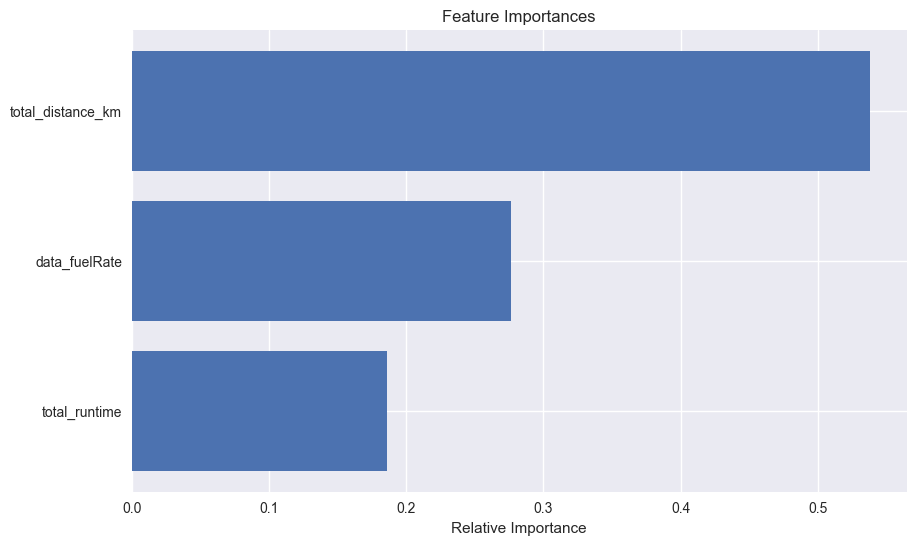

In [350]:
feature_importances = rf.feature_importances_
feature_names = X.columns
indices = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [336]:
predictions = rf.predict(X) 

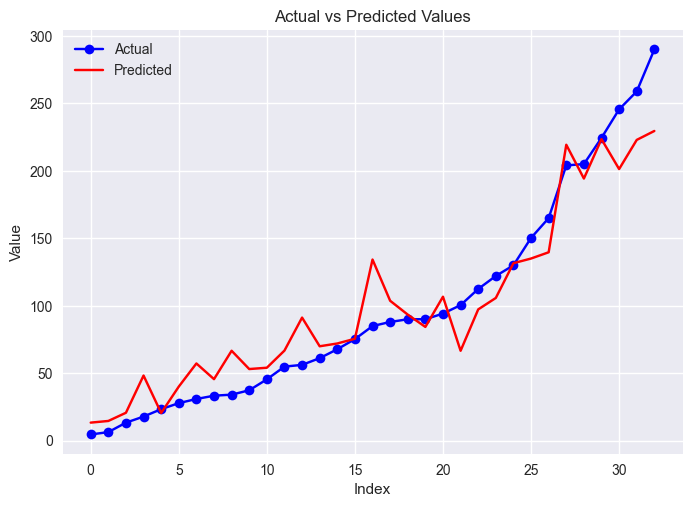

In [337]:
index = range(len(y))

plt.plot(index, y, color='blue', label='Actual', marker='o')
plt.plot(index, predictions, color='red', label='Predicted', marker='x')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

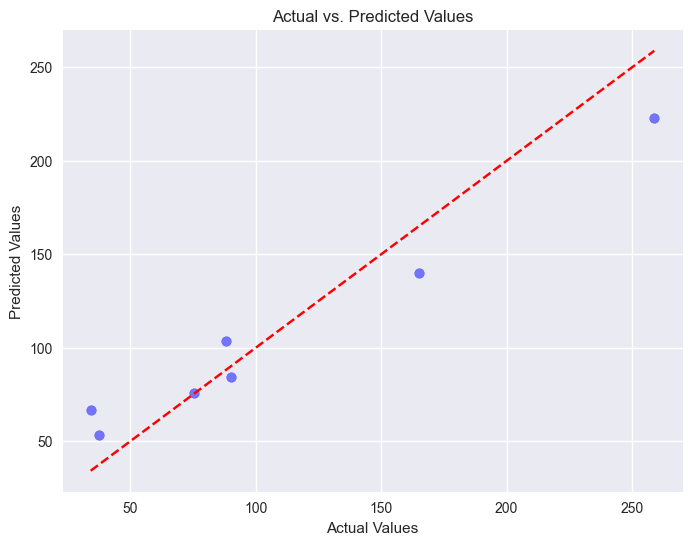

In [338]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

In [339]:
percentage = [100 - ((((abs((actual - predicted) /actual))%100) * 100) % 100) for actual, predicted in zip(y, predictions)]
percentage_rounded = [round(value, 2) for value in percentage]
percentage_rounded

[15.22,
 72.89,
 45.69,
 31.14,
 87.91,
 56.23,
 15.22,
 63.38,
 5.07,
 58.08,
 81.11,
 78.42,
 37.82,
 85.63,
 93.72,
 99.66,
 42.07,
 82.18,
 96.19,
 93.65,
 86.72,
 66.38,
 86.55,
 86.68,
 98.8,
 89.84,
 84.66,
 92.51,
 94.79,
 99.57,
 81.99,
 86.13,
 79.18]

In [340]:
for actual, predicted in zip(y, predictions):
    print(actual, predicted)

4.75 13.527148529481858
6.5 14.762474498307826
13.5 20.83188791172124
18.0 48.39482291815626
23.5 20.658218814052137
27.97 40.21299611516281
31.04 57.357152616902646
33.48 45.73995056961731
34.25 66.76519237094237
37.5 53.22080890414224
45.59 54.20268632918635
55.02 66.8956021378521
56.32 91.34132571857563
61.29 70.09633844558846
67.9 72.16216560608233
75.41 75.66925347967019
85.07 134.35377377377387
88.11 103.80849903474899
90.11 93.54704306687648
90.14 84.41827588302591
94.29 106.80972174555514
100.58 66.76519237094237
112.55 97.4088540921875
122.18 105.90252212927211
130.08 131.64211011011017
150.38 135.10393224176556
165.06 139.73859212784214
204.11 219.3960558578059
205.06 194.3702484789985
224.5 223.53613443638454
245.63 201.38680852280848
258.89 222.9894084961586
289.99 229.6094507527008


In [344]:
pred_data = pd.DataFrame({"actual_fuel_cosumption": y, "predicted_fuel_consumption": predictions, "accruacy_percentage": percentage_rounded})

In [346]:
pred_data.to_csv('predicted_vs_actual_data.csv', index = False)

In [249]:
sns.plot(y)

AttributeError: module 'seaborn' has no attribute 'plot'

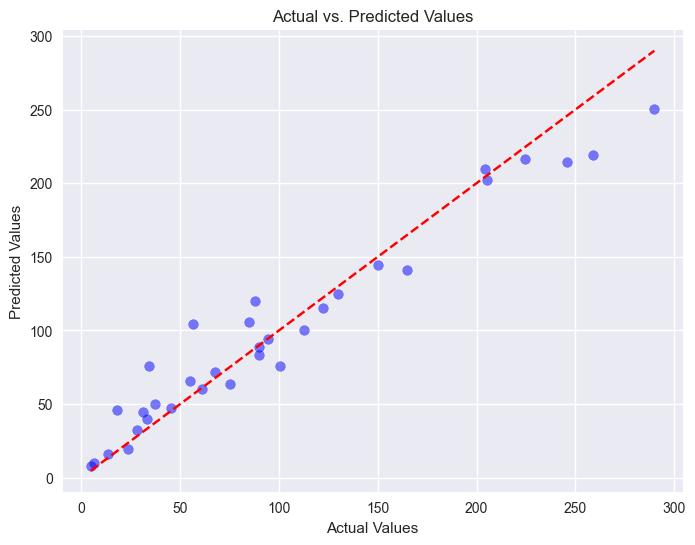

In [240]:
plt.figure(figsize=(8, 6))
plt.scatter(y, predictions, color='blue', alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.xlabel('Actual Values') 
plt.ylabel('Predicted Values') 
plt.title('Actual vs. Predicted Values') 
plt.grid(True) 
plt.show()

In [237]:
pd.DataFrame({"y_test": y_test, "y_pred": y_pred})

,y_test,y_pred
36,258.89,218.9232
15,75.41,63.3426
27,165.06,141.3395
17,88.11,119.8646
8,34.25,76.1881
9,37.50,50.3597
19,90.14,83.5172


In [ ]:
# 2. Linear Regression 

In [352]:
lr = LinearRegression()

cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(lr, scaled_standard_X, y, cv=cv, scoring=make_scorer(r2_))

scores

array([ 0.30078432, -1.12597218, -2.20527705, -0.90558164,  0.80576615,
        0.67325908,  0.1493559 ,  0.42312134,  0.70321183,  0.7004993 ])

In [359]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test) 
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 

print(f'Mean Squared Error: {mse}') 
print(f'R2 Score: {r2}')

Mean Squared Error: 2224.5389017475386
R2 Score: 0.5923977210936526


In [360]:
coefficients = lr.coef_
coefficients

array([2.19091554e+00, 1.23469173e-04, 1.73667872e+00])

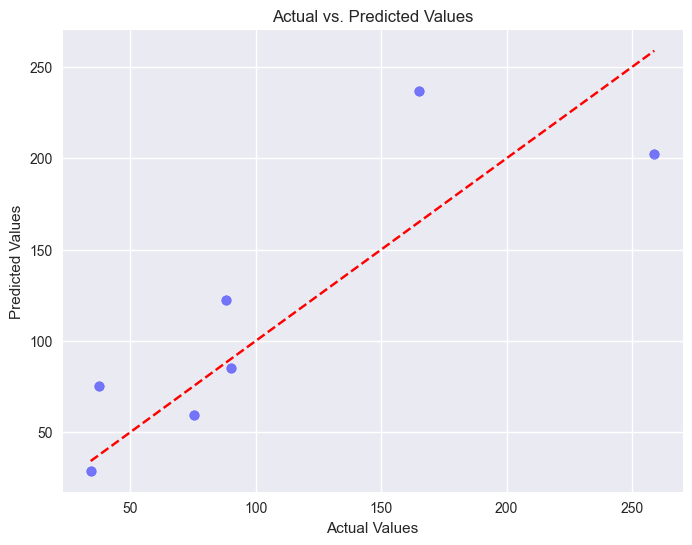

In [228]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

In [163]:
# polynomial regression

In [178]:
from sklearn.pipeline import Pipeline

In [354]:
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('reg', LinearRegression())
])

parameters = {
    'poly__degree': degrees
}

grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_degree = grid_search.best_params_['poly__degree']

best_degree

1

In [355]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 1)
X_poly = poly_reg.fit_transform(scaled_standard_X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

In [188]:
y.shape

(32,)

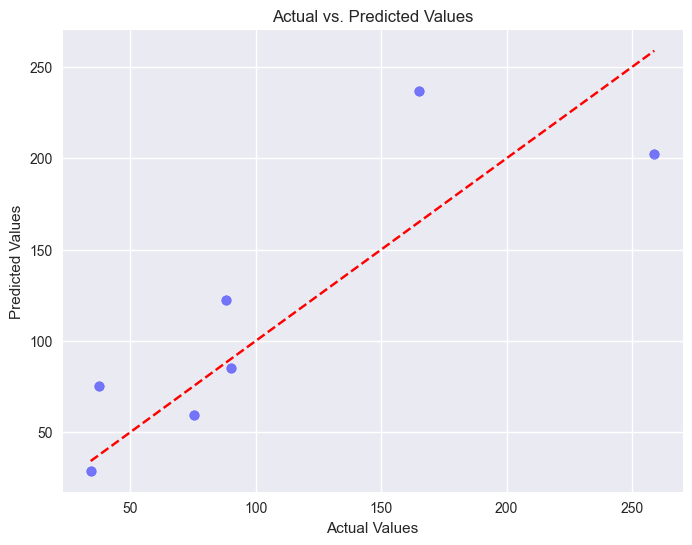

In [231]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()